#### HR Analytics EDA

#### fearures description
    1. employee_id - Unique ID for employee
    2. department - Department of employee
    3. region - Region of employment (unordered)
    4. education - Education Level
    5. gender - Gender of Employee
    6. recruitment_channel - Channel of recruitment for employee
    7. no_of_trainings - no of other trainings completed in previous year on soft skills, technical skills etc.
    8. age - Age of Employee
    9. previous_year_rating - Employee Rating for the previous year
    10. length_of_service - Length of service in years
    11. KPIs_met >80% - if Percent of KPIs(Key performance Indicators) >80% then 1 else 0
    12. awards_won? - if awards won during previous year then 1 else 0
    13. avg_training_score - Average score in current training evaluations
    14. is_promoted - (Target) Recommended for promotion
#### Evaluation Metric
     F1 Score

In [1]:
## Importing the required Packages
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from datetime import datetime, date, time
from pandas_profiling import ProfileReport
import joblib
# to display all columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import figure
from pylab import rcParams
import scipy.stats as stats

In [3]:
#import copy
#import statistics
#from scipy.stats import chi2_contingency, chisquare, lognorm, kstest, shapiro, normaltest, chi2
#import scipy
#import statsmodels.api as sm
#from category_encoders import TargetEncoder
#from itertools import combinations

#### Importing Source Train File

In [4]:
#### source dataset ####
train_data = pd.read_csv("C:\\Users\\krupakar\\Desktop\\PythonPractise\\Datasets\\Vidya_Analytics_Hackathon\\HR Analytics\\train_LZdllcl.csv")
print(train_data.shape)
X_train = train_data.copy()
print(X_train.shape)

(54808, 14)
(54808, 14)


In [5]:
#### renaming the column names ####
X_train= X_train.rename(columns = {'no_of_trainings': 'trainings_attended',
                                     'previous_year_rating': 'previous_rating',
                                     'length_of_service': 'service_yrs', 
                                     'KPIs_met >80%' : 'kpi', 
                                     'awards_won?' : 'awarded', 
                                     'is_promoted' : 'promoted' })

In [6]:
#### drop duplicate rows ####
#df_combine = df_combine.drop_duplicates(keep = 'first')
#df_train.shape

In [7]:
# reset index
X_train = X_train.reset_index()
X_train.shape

(54808, 15)

In [8]:
#### dropping empoyee id ####
X_train = X_train.drop(labels = ['recruitment_channel'], axis =1)
print(X_train.shape)

(54808, 14)


In [9]:
#### basic data validations ####
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
index                 54808 non-null int64
employee_id           54808 non-null int64
department            54808 non-null object
region                54808 non-null object
education             52399 non-null object
gender                54808 non-null object
trainings_attended    54808 non-null int64
age                   54808 non-null int64
previous_rating       50684 non-null float64
service_yrs           54808 non-null int64
kpi                   54808 non-null int64
awarded               54808 non-null int64
avg_training_score    54808 non-null int64
promoted              54808 non-null int64
dtypes: float64(1), int64(9), object(4)
memory usage: 5.9+ MB


In [10]:
#### nan or null columns ####
X_train.isna().sum()

index                    0
employee_id              0
department               0
region                   0
education             2409
gender                   0
trainings_attended       0
age                      0
previous_rating       4124
service_yrs              0
kpi                      0
awarded                  0
avg_training_score       0
promoted                 0
dtype: int64

#### insights :
    1. education = 4.4%
    2. last_rating = 7.6 %

In [11]:
#### unique values count ####
X_train.nunique()

index                 54808
employee_id           54808
department                9
region                   34
education                 3
gender                    2
trainings_attended       10
age                      41
previous_rating           5
service_yrs              35
kpi                       2
awarded                   2
avg_training_score       61
promoted                  2
dtype: int64

### Exploratory Data Analysis

#### 1. Promoted Target Feature Analysis

promotion counts: 
0    50140
1     4668
Name: promoted, dtype: int64



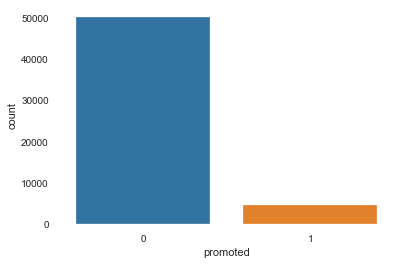

In [12]:
#### promoted analysis ####
print('promotion counts: ')
print(X_train['promoted'].value_counts())
print()
sns.countplot(X_train['promoted'])
plt.show()

#### Observations:
    1. class imbalance dataset
    2. only 8.5% of the employees are recommonded for promotion

### Independent variables Explanatory Data Analysis

#### 1. Average Training Score

In [13]:
#### description of the numerical variables ####
X_train['avg_training_score'].describe()

count    54808.000000
mean        63.386750
std         13.371559
min         39.000000
25%         51.000000
50%         60.000000
75%         76.000000
max         99.000000
Name: avg_training_score, dtype: float64

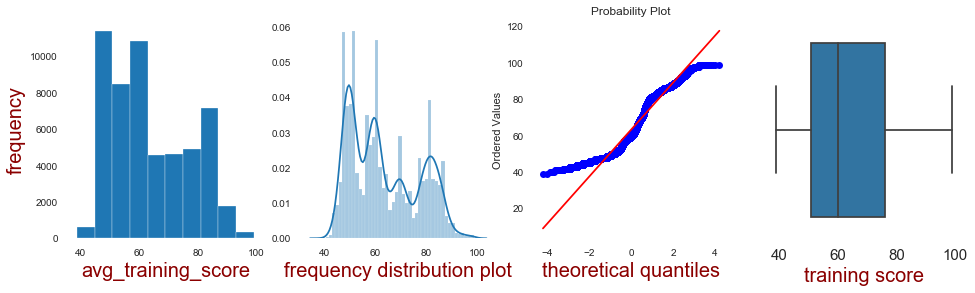

In [14]:
##### average training score plots #####
plt.figure(figsize=(16,4))

plt.subplot(1,4,1)
plt.hist(X_train['avg_training_score'])
plt.xlabel("avg_training_score", fontsize = 20,  color = 'darkred')
plt.ylabel("frequency", fontsize = 20, color = 'darkred')
#plt.title("employee training score distribution", fontsize = 20, color = 'darkred')

plt.subplot(1,4,2)
sns.distplot(X_train['avg_training_score'] )
plt.xlabel("frequency distribution plot", fontsize = 20, color = 'darkred')
#plt.title("employee training score probability plot", fontsize = 20, color = 'darkred')

plt.subplot(1,4,3)
stats.probplot(X_train['avg_training_score'], dist= 'norm', plot= plt)
plt.xlabel("theoretical quantiles", fontsize = 20, color = 'darkred')
#plt.ylabel("observed values", fontsize = 20, color = 'darkred')
#plt.title("employee training score probability plot", fontsize = 20, color = 'darkred')

plt.subplot(1,4,4)
sns.boxplot(X_train['avg_training_score'])
plt.xlabel("training score", fontsize = 20,  color = 'darkred')
#plt.title("employee training score outliers", fontsize = 20, color = 'darkred')
plt.xticks(fontsize = 15)

plt.show()

In [15]:
#### checking the skewness of the average training score ####
X_train['avg_training_score'].skew()

0.45190808551707995

#### Observations :
    1. moderately right skewed data i.e. mean is greater than median
    2. 50% of the employees average training score lies in the range of 51 to 76
    3. No outliers

#### 2. Service Years

In [16]:
#### description of employees Service Years variable ####
X_train['service_yrs'].describe()

count    54808.000000
mean         5.865512
std          4.265094
min          1.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         37.000000
Name: service_yrs, dtype: float64

#### Observations:
    1. 50% of the employees service yrs lies between 3 to 7 yrs
    2. min service yrs of experience of any employee is 1 yr and max is 37 yrs
    3. 75% of the employees service experience is less or equal to 7 yrs
    4. Therefore based on data distribution, create bins based on quantiles of service yrs

#### 3. Age

In [17]:
#### description of the employees age variable ####
X_train['age'].describe()

count    54808.000000
mean        34.803915
std          7.660169
min         20.000000
25%         29.000000
50%         33.000000
75%         39.000000
max         60.000000
Name: age, dtype: float64

#### Observations:
    1. minimum age of the employee is 20 yrs and maximum age of the employee is 60 yrs
    2. 50% of the employees are aged between 29 and 39 yrs of age
    3. 75% of the employees are below 40 yrs old
    4. Therefore based on data distribution, create bins based on quantiles of ages

#### 4. department

Percentage of Department: 


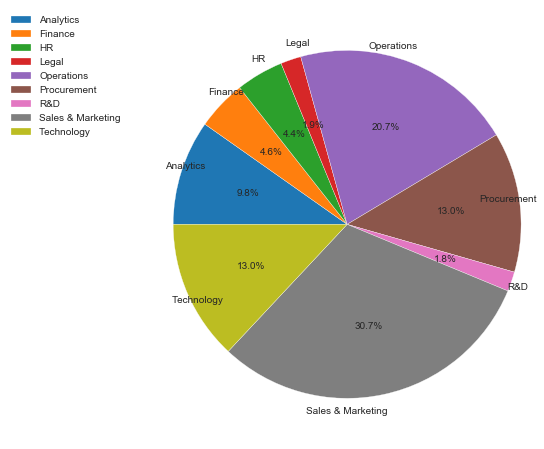

In [18]:
#### Analysis of Department variable  ####
plt.figure(figsize=(12,8))
print("Percentage of Department: ")
labels = X_train.groupby(['department'])['department'].count().index
plt.pie(X_train.groupby(['department'])['department'].count()/X_train.shape[0] * 100, autopct='%1.1f%%',  labels= labels)
plt.legend()
plt.xlim(1.5)
plt.show()

#### Observations:
    1. 51% of the employees belong to Sales Marketing(30.9%) and Operations(20.6%)
    2. Least no of employees belong to Legal(1.8%) and R&D department(1.8%)

#### 5. Region

In [19]:
#### Analysis of Region variable  ####
#### Handling Rare Labels Function ####
def f_find_frequent_labels (dataset, var, threshold) :
    tmp = dataset.groupby([var]).size()/dataset.shape[0]
    frequent_ls = tmp[tmp > threshold].index
    return frequent_ls

In [20]:
#### Handling rare labels of Region categories based on Frequency distribution ####
freq_region_lst = f_find_frequent_labels(X_train, "region", 0.01)

In [21]:
#### Handling Rare label for region code #####
X_train["region_rare"] = np.where(X_train["region"].isin(freq_region_lst), X_train["region"], 'others' )

region_2     22.520435
region_22    11.728215
region_7      8.836301
region_15     5.123340
others        5.066779
region_13     4.831411
region_26     4.123486
region_31     3.530506
region_4      3.107211
region_27     3.026930
region_16     2.672967
region_28     2.404758
region_11     2.399285
region_23     2.143848
region_29     1.813604
region_32     1.724201
region_19     1.594658
region_20     1.550868
region_14     1.508904
region_25     1.494307
region_17     1.452343
region_5      1.397606
region_6      1.258940
region_30     1.198730
region_8      1.195081
region_10     1.182309
region_1      1.112976
Name: region_rare, dtype: float64
Cnt of total regions:  27


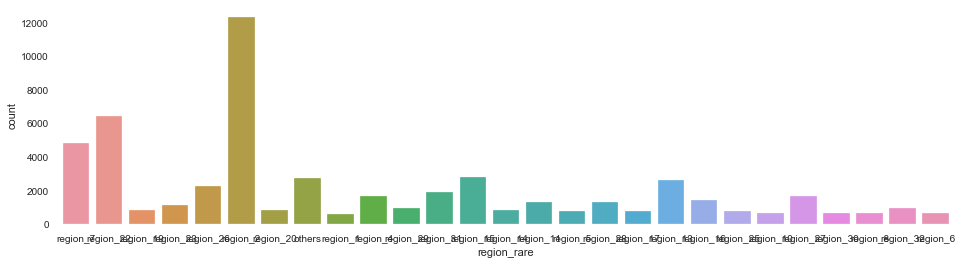

(54808, 15)

In [22]:
#### Analysis of Region after handling rare regions ####
plt.figure(figsize= (16, 4))
print(X_train["region_rare"].value_counts()/X_train.shape[0] * 100)
print("Cnt of total regions: ", X_train["region_rare"].nunique())
sns.countplot(X_train['region_rare'])
plt.show()
X_train.shape

#### 6. Education

In [23]:
#### replacing nan education value ####
def f_edu_impute (dataset):
    edu = []
    
    for i in range(0, dataset.shape[0]) :
        if pd.isna(dataset['education'][i]) :       
            if dataset['region'][i] == 'region_3' :
                if dataset['gender'][i] == 'm' :
                    #dataset['education'][i] = "Bachelor's"
                    edu.append("Bachelor's")
                else:
                    #dataset['education'][i] = "Master's & above"
                    edu.append("Master's & above")
            elif dataset['region'][i] == 'region_10' :
                #dataset['education'][i] = "Master's & above"
                edu.append("Master's & above")
            else :
                #dataset['education'][i] =  "Bachelor's"  
                edu.append("Bachelor's")
        else :
            edu.append(dataset['education'][i])
            
    return edu

In [24]:
#### calling f_edu_impute impute function ####
edu = list(f_edu_impute(X_train))
print(len(edu))
#### adding new column education_nan ####
X_train['education_nan'] = edu
X_train.shape

54808


(54808, 16)

#### 7. Gender

m    38496
f    16312
Name: gender, dtype: int64


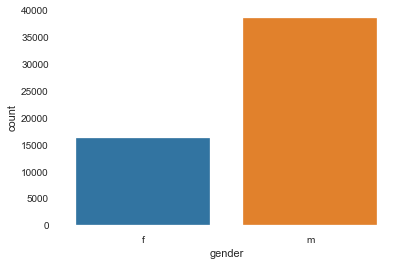

In [25]:
#### Analysis of Gender variable  ####
print(X_train['gender'].value_counts())
sns.countplot(X_train['gender'])
plt.show()

#### Observations :
    1. 30% of the employees are females
    2. 70% of the employees are males

In [26]:
#### gender label encoding ####
X_train['gender_le'] = np.where(X_train['gender'] == 'm', 1, 0)
X_train.shape

(54808, 17)

#### 8. Trainings Attended

Percentage of No of Trainings Attended: 


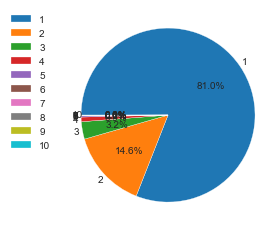

In [27]:
#### Analysis of Trainings Attended variable  ####
plt.figure(figsize=(8,4))
print("Percentage of No of Trainings Attended: ")
labels = X_train.groupby(['trainings_attended'])['trainings_attended'].count().index
plt.pie(X_train.groupby(['trainings_attended'])['trainings_attended'].count()/X_train.shape[0] * 100, autopct='%1.1f%%',  labels= labels)
plt.legend()
plt.xlim(1.5)
plt.show()

#### Observations :
    1. 81% of the employees attended only one training program in previous year
    2. 14.5% of the employees atteneded two training programs in previous year
    3. Only 4.5% of the employees attended more than two training programs in previous year

#### 9. Previous Rating

In [28]:
#### handling of Nan values for Previous Rating ####
X_train['previous_rating_nan'] = X_train['previous_rating'].fillna(0)
X_train.shape

(54808, 18)

3.0    33.969494
5.0    21.422055
4.0    18.021092
1.0    11.354182
2.0     7.708729
0.0     7.524449
Name: previous_rating_nan, dtype: float64


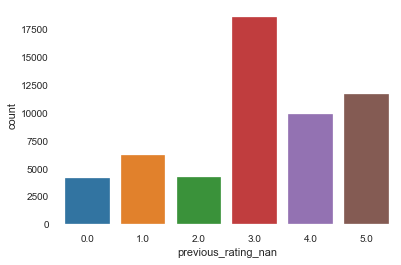

In [29]:
#### Analysis of Trainings Attended variable  ####
print(X_train['previous_rating_nan'].value_counts()/X_train.shape[0] * 100)
sns.countplot(X_train['previous_rating_nan'])
plt.show()

#### Observations :
    1. 7.5% of the employees are new joiners
    2. 21.4% of the employees were top performers for the previous year
    3. 34% of the employees were average performers for the previous year
    4. 19% of the employees were below average performers for the previous year
    5. 39.4% of the employees were above average performers for the previous year

#### 10. Key Performance Indicator (KPI) 

0    35517
1    19291
Name: kpi, dtype: int64


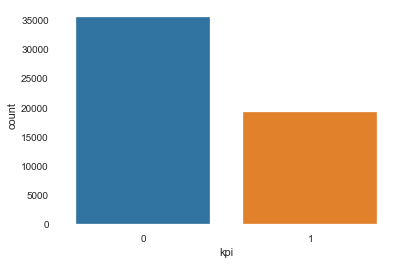

In [30]:
#### Analysis of KPI variable  ####
print(X_train['kpi'].value_counts())
sns.countplot(X_train['kpi'] )
plt.show()

#### Observations : 
    1. Only 35% of the employees met KPI
    2. 65% of the employees didn't meet the KPI

#### 11. Awarded

Percentage of employees Awarded last year: 


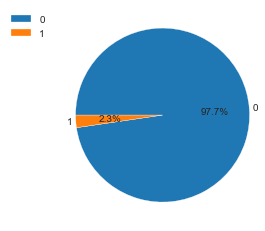

In [31]:
#### Analysis of Awarded variable  ####
plt.figure(figsize=(8,4))
print("Percentage of employees Awarded last year: ")
labels = X_train.groupby(['awarded'])['awarded'].count().index
plt.pie(X_train.groupby(['awarded'])['awarded'].count()/X_train.shape[0] * 100, autopct='%1.1f%%',  labels= labels)
plt.legend()
plt.xlim(1.5)
plt.show()

#### Observations :
    1. Only 2.3% of the employees have won the award in previous year
    2. 97.7% of the employees haven't won the award in previous year

#### pickling ####

In [32]:
#### pickling train dataset for further processing ####
print(X_train.shape)
print(joblib.dump(X_train, "df_train_eda.pkl"))

(54808, 18)
['df_train_eda.pkl']


In [33]:
#### preprocessing #####
print(joblib.dump(freq_region_lst, "preprocessing.pkl"))

['preprocessing.pkl']


### Comments are appreciated on the approach.. Thank You 